In [1]:
import os.path
import matplotlib.pyplot as plt
from tensorflow.python import pywrap_tensorflow
import numpy as np
import xml.etree.cElementTree as ET
%matplotlib inline

In [5]:
path = '../activations'
num_files = len([f for f in os.listdir(path)
                if os.path.isfile(os.path.join(path, f))])
ann_path = '../data/VOCdevkit2007/VOC2007/Annotations'
CLASSES = ('__background__',
           'aeroplane', 'bicycle', 'bird', 'boat',
           'bottle', 'bus', 'car', 'cat', 'chair',
           'cow', 'diningtable', 'dog', 'horse',
           'motorbike', 'person', 'pottedplant',
           'sheep', 'sofa', 'train', 'tvmonitor')
class_to_ind = dict(list(zip(CLASSES[1:], list(range(len(CLASSES[1:]))))))
arr_hm = [np.empty([num_files,21,64], dtype=float),
            np.empty([num_files,21,64], dtype=float),
            np.empty([num_files,21,128], dtype=float),
            np.empty([num_files,21,128], dtype=float),
            np.empty([num_files,21,256], dtype=float),
            np.empty([num_files,21,256], dtype=float),
            np.empty([num_files,21,256], dtype=float),
            np.empty([num_files,21,512], dtype=float),
            np.empty([num_files,21,512], dtype=float),
            np.empty([num_files,21,512], dtype=float),
            np.empty([num_files,21,512], dtype=float),
            np.empty([num_files,21,512], dtype=float),
            np.empty([num_files,21,512], dtype=float)]
num_clas = [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

In [54]:
def read_ann(path):

    clas = []
    tree = ET.parse(path)
    objs = tree.findall('object')
    for ix, obj in enumerate(objs):
        clas.append(obj.find('name').text.lower().strip())

    return clas

In [55]:
# calculate the activation versus classes matrix
print 'loading data from text files'
predictions = np.zeros([len(os.listdir(path)),21])
for file_ind,filename in enumerate(os.listdir(path)):
#     print 'processing file {}'.format(filename)
    clas = []
    acts = []
    f = open('/'.join([path,filename]),'r')
    act_ind = 0
    for line in f.readlines():
#         if line and line[0].isalpha():
#             clas.append(line[:-1])
        if line.startswith('['):
            if not line.endswith(']/n'):
                acts.append([])
                acts_this_line = line[2:-1].split(' ')
                for i in acts_this_line:
                    if i is not '':
                        acts[act_ind].append(float(i))
            else:
                raise IOError('Error line with fewer numbers than expected.')
        if line.startswith(' '):
            # print 'starts with nothing'
            if line.endswith(']\n'):
                acts_this_line = line[:-2].split(' ')
                for i in acts_this_line:
                    if i is not '':
                        acts[act_ind].append(float(i))
                act_ind += 1
            else:
                acts_this_line = line.split(' ')
                for i in acts_this_line:
                    if i is not '':
                        acts[act_ind].append(float(i))

    ann_filepath = os.path.join(ann_path,'%06d'%(int(filename[:-4])+1)+'.xml')
    clas = read_ann(ann_filepath)
    for ind,item in enumerate(CLASSES[1:]):
        if item in clas:
            file_ind = int(filename[:-4])
            for j in range(13):
                arr_hm[j][file_ind][ind] += acts[j]
            num_clas[ind+1] = num_clas[ind+1] + 1
            ind_for_item = class_to_ind[item]
            predictions[file_ind][ind_for_item] += 1
print 'loaded'

loading data from text files
loaded


In [61]:
print num_clas

[1, 219, 239, 319, 187, 265, 174, 741, 332, 552, 138, 251, 442, 291, 241, 2088, 267, 105, 360, 254, 251]


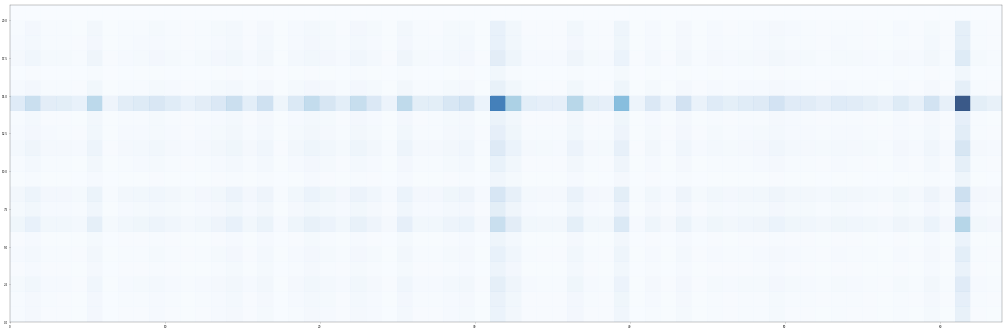

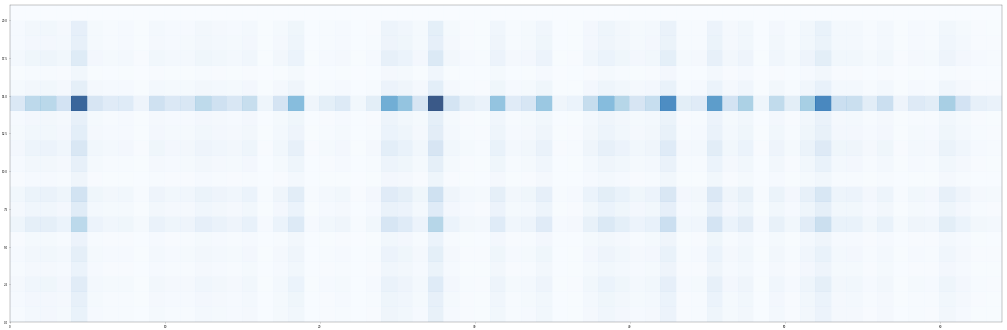

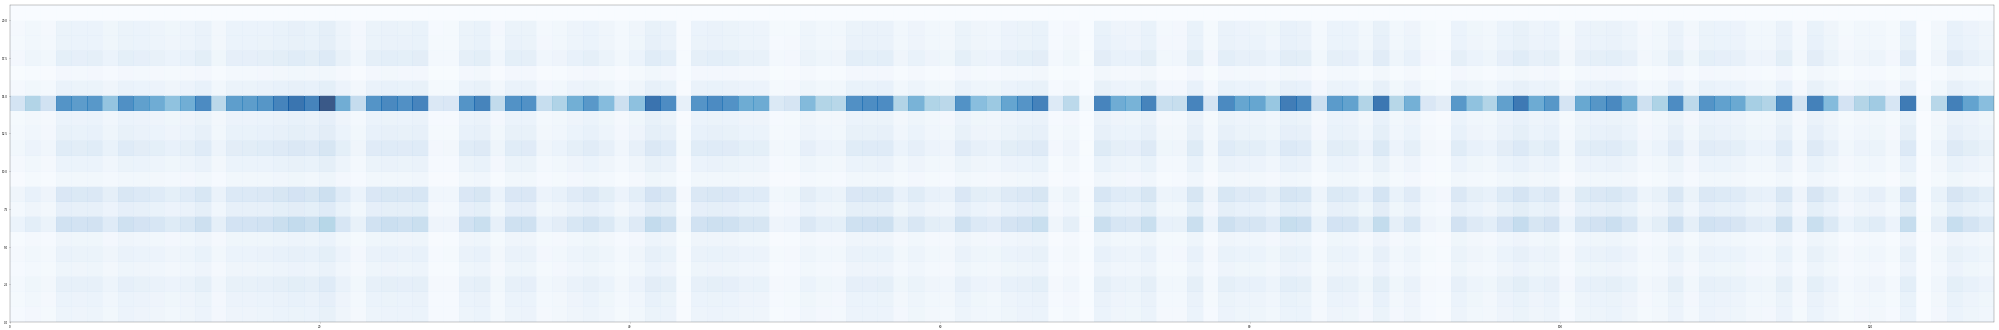

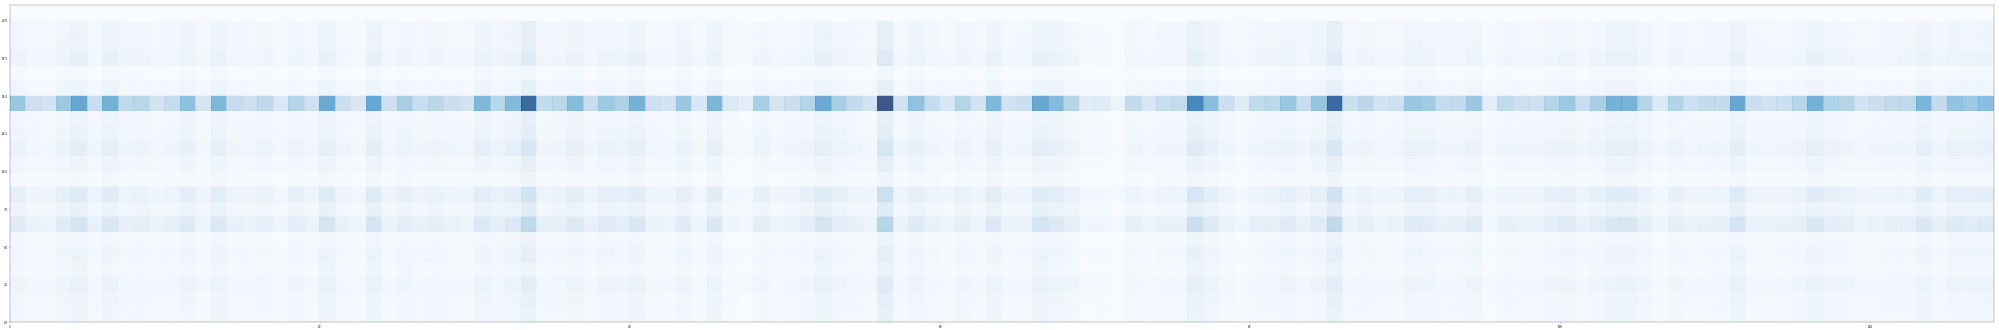

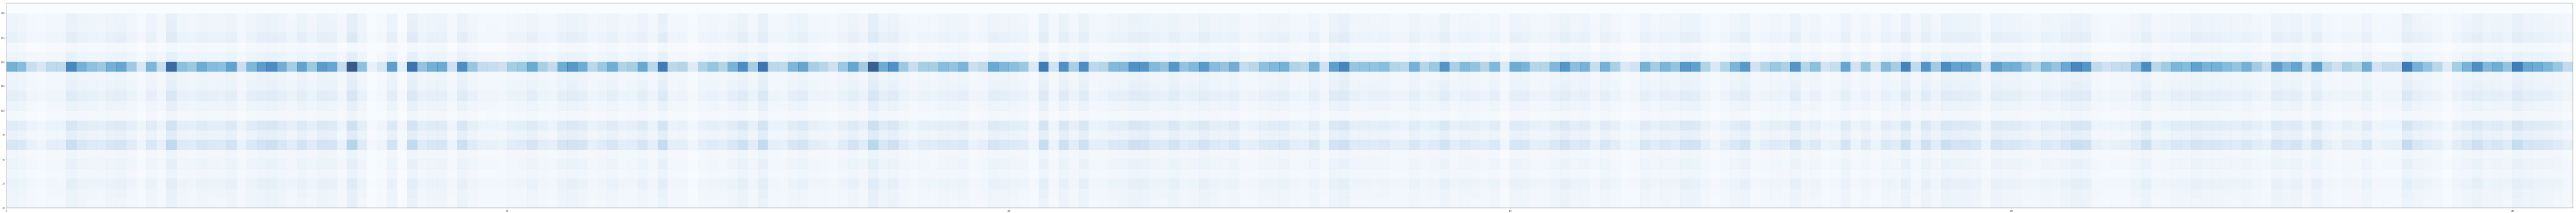

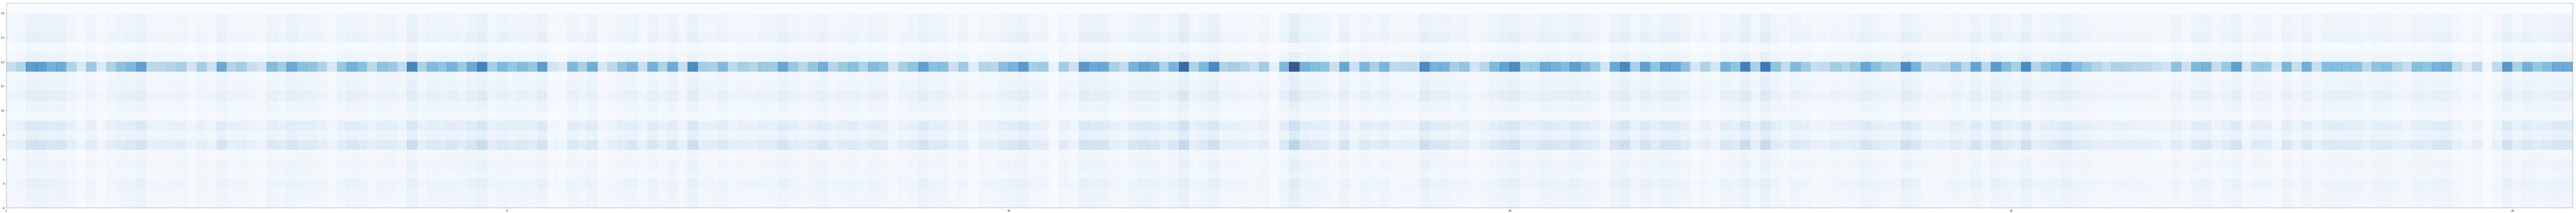

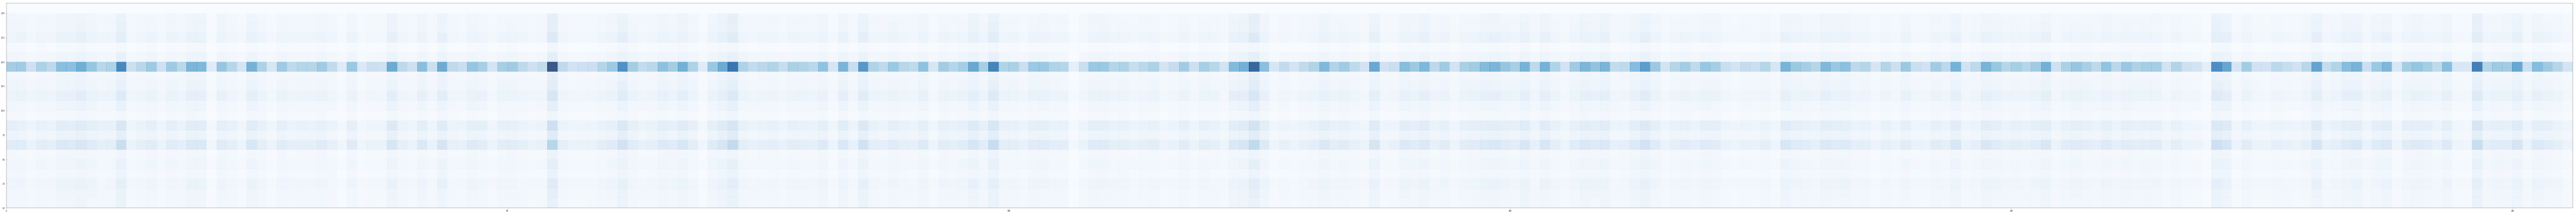

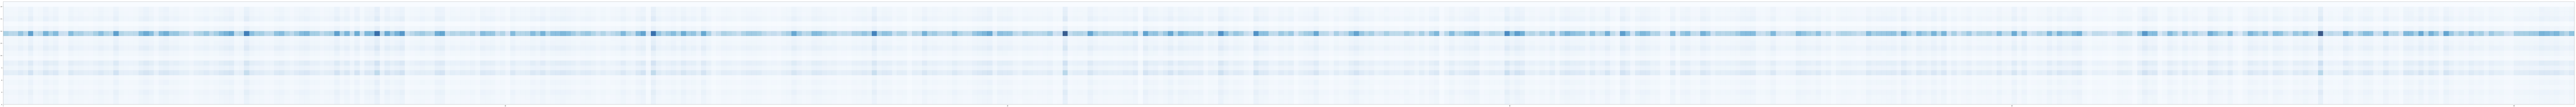

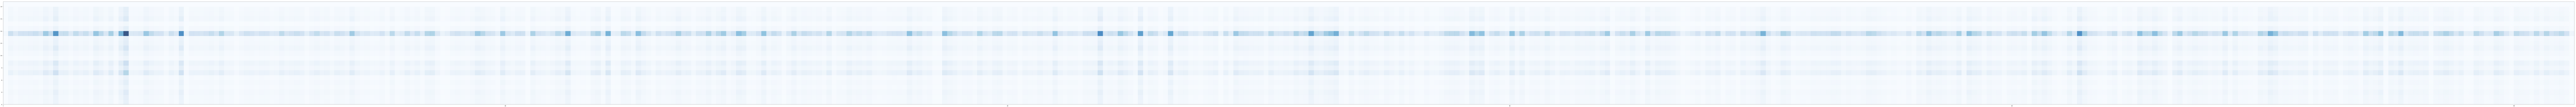

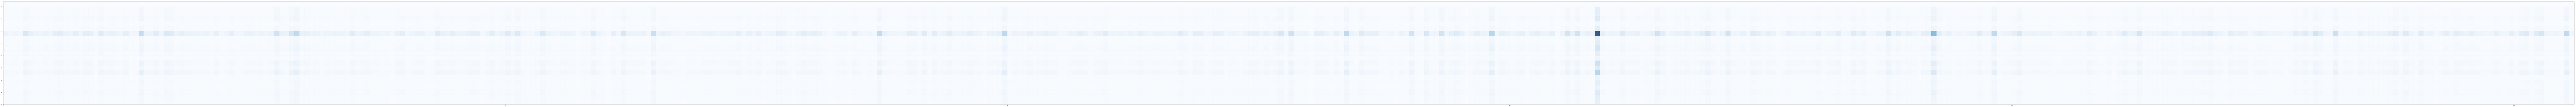

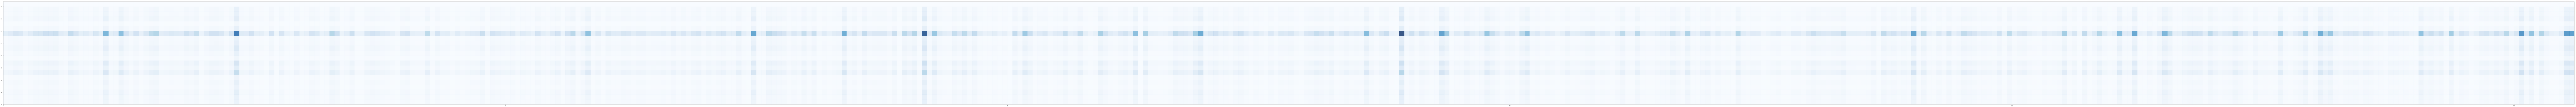

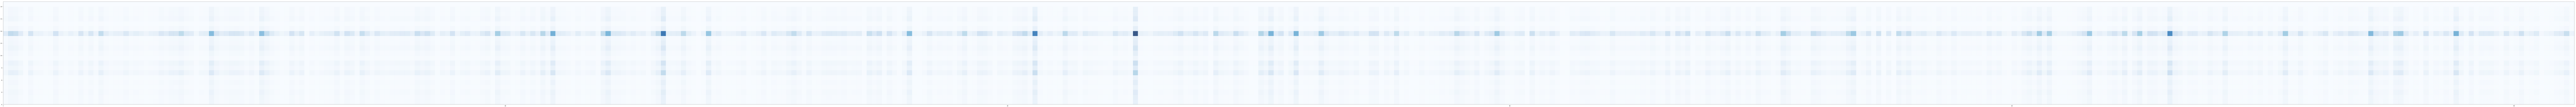

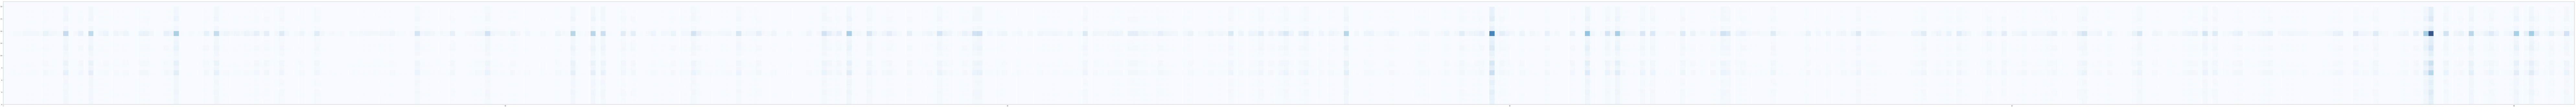

In [57]:
for i in range(13):
#     arr_hm_average = np.average(arr_hm[i],axis=0)
#     print arr_hm_average
    arr_hm_new = np.sum(arr_hm[i], axis=0)/num_clas[i]
#     print arr_hm_new.shape

    fig= plt.figure(figsize=(arr_hm_new.shape[1], 21), dpi= 20, facecolor='w', edgecolor='k')
    ax = plt.axes()
    plt.subplot()
    heatmap = ax.pcolormesh(arr_hm_new,cmap=plt.cm.Blues,alpha=0.8)
    plt.savefig('{}.png'.format(i))

In [65]:
# correlation with data amount for each class
for i in range(13):
    arr_hm_new = np.sum(arr_hm[i], axis=(0,2))/num_clas[i]
    corr_weights_acts = np.corrcoef([num_clas[::-1],arr_hm_new])
    print corr_weights_acts[0][1]  

-0.101376143265
-0.101467247004
-0.10168089091
-0.101366586878
-0.0999567165417
-0.100643077458
-0.0991837889875
-0.100151367361
-0.0998163584602
-0.0984147887492
-0.0993331347168
-0.0986174498117
-0.0993077508271


In [70]:
print len(arr_hm_new)
print len(num_clas)
print num_clas[::-1]

21
21
[251, 254, 360, 105, 267, 2088, 241, 291, 442, 251, 138, 552, 332, 741, 174, 265, 187, 319, 239, 219, 1]
